# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


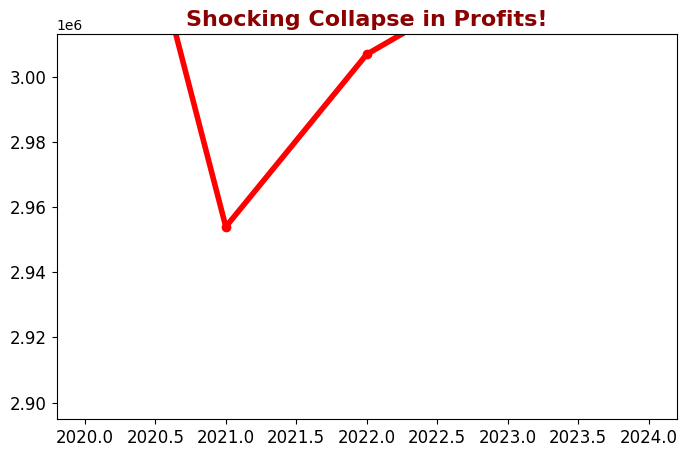

In [3]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Write your notes about bad chart #1 here:

1. Review each chart and note at least three issues you see.  
    - As currently is, X-axis no lables. Is it years? Can't rely on viewer to assume. 
    - What is the Y-axis? Millions, thousands, hundreds, sales?
    - What is the 1e6 above the graph?
    - Y-axis should start at 2.94, and should have 2.95, 2.97, 2.99, and maybe above 3.00 listed
    - Should remove the outer outlines above and to the right of the chart. 
    - The title is rather baiting, and tells the viewer what to see instead of letting them arrive at their own conclusion .
    - The red color of the line leads me to view it as a negative line. Should be in black for neutrality
    - 

2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

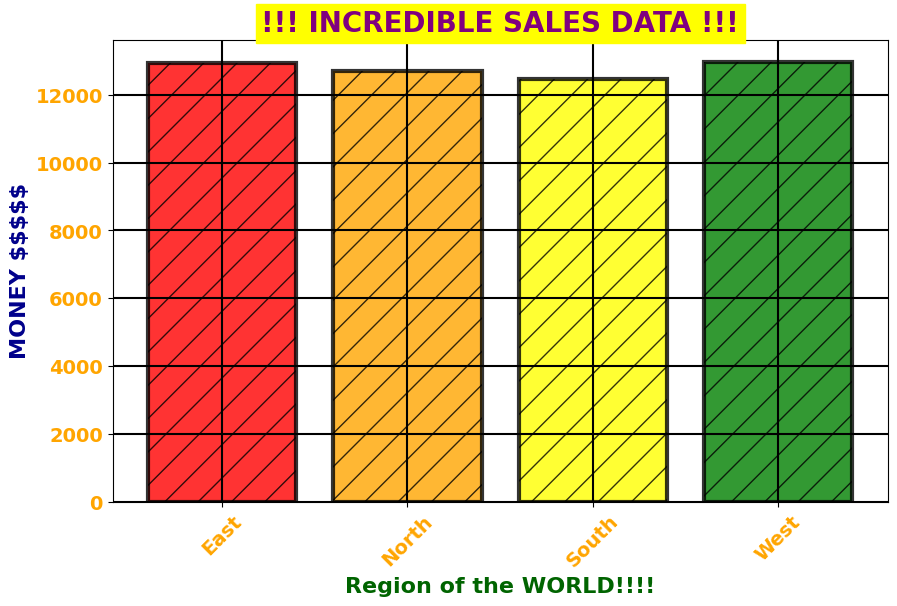

In [4]:
# dont remember if there was an error here. I may have accidentally deleted something or typed something
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()

### Write your notes about bad chart #2 here:
(double click to open this markdown cell and type into it)
- What year is this?
- Is the Y-axis in thousands?
- Why the lines in each bar?
- What are the sales by each category?

## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


In [5]:
# Your GOOD visualization(s) here



In [6]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      1200 non-null   int64  
 1   Month     1200 non-null   object 
 2   Region    1200 non-null   object 
 3   Category  1200 non-null   object 
 4   Sales     1200 non-null   int64  
 5   Profit    1200 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 56.4+ KB


In [7]:
# group dataframe by  Year and Region and get the sum of Sales for each
grouped_sales = coffee_df.groupby(['Year','Region'])['Sales'].sum().unstack()

Separated sales by region by year. 
Added a legend. 
ecided to leave the box outline to contain the graph.
Added x and y labels. 
Still not sure what the y axis was in the original, but assumed it was average sales, and broke out sales by year and region

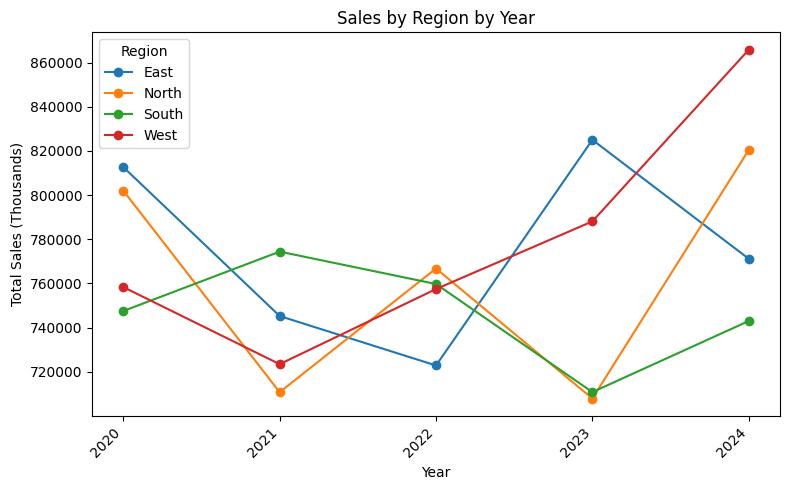

In [8]:
plt.figure(figsize=(8,5))

# Loop over each column in grouped_sales to create a plot connecting each year
for column in grouped_sales.columns:
    plt.plot(grouped_sales.index, grouped_sales[column], label=column, marker='o')

plt.title('Sales by Region by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (Thousands)')
plt.xticks(grouped_sales.index)
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Given more time I would break out the below graph into lowest and highest performing year/month for region. Would do the same for categories
Imported numpy to create positions for the bars on the x axis for each bar


In [9]:
# Filter by Region, Month, and Category
sales_summary = coffee_df.groupby(['Region', 'Month', 'Category'])['Sales'].sum().unstack(fill_value=0)

<function matplotlib.pyplot.show(close=None, block=None)>

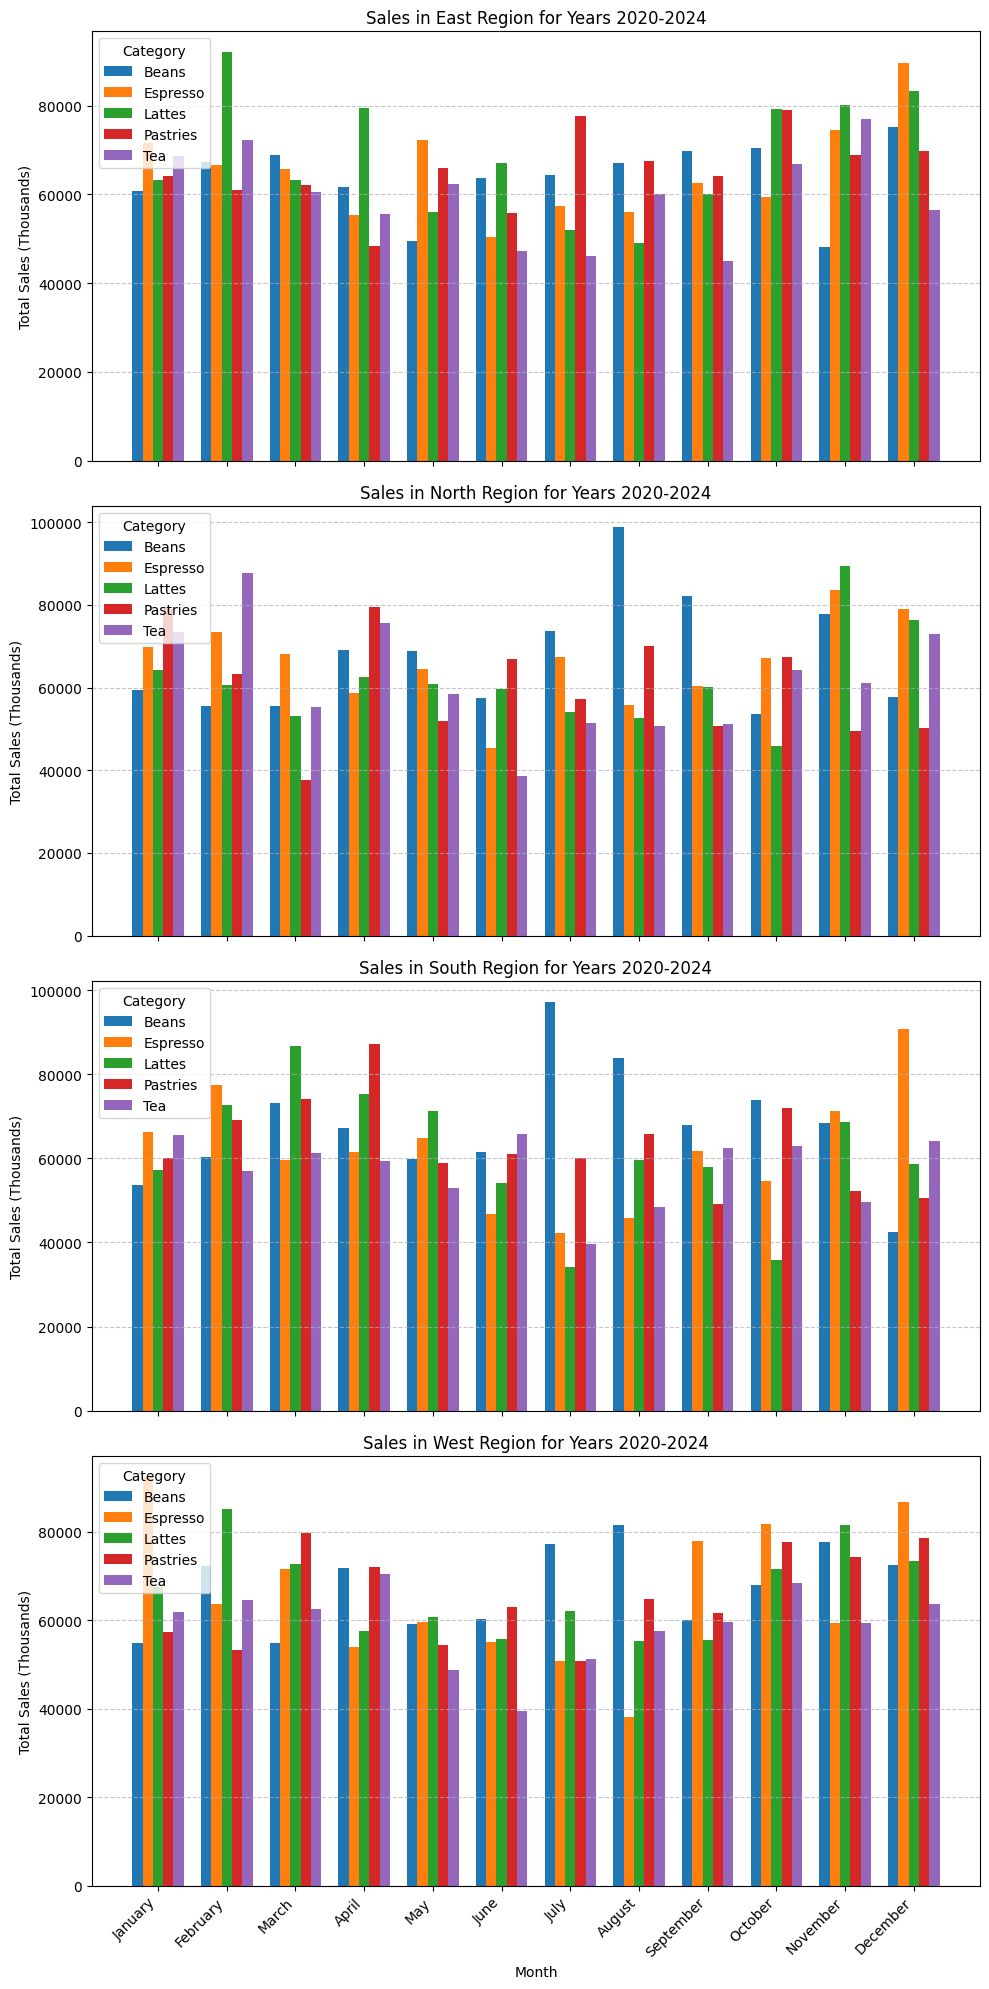

In [ ]:
# Break out each region for making sub plots
# .unstack - reshape dataframe to index level - note for self
regions = sales_summary.index.get_level_values('Region').unique()
x_regions = len(regions)

fig, axes = plt.subplots(x_regions, 1, figsize=(10, 5 * x_regions), sharex=True)
# if there is a single subplot
if x_regions == 1:
    axes = [axes]

# create list of months. 
month = ["January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"]

# Show grouping by month of each category
bar_width = .15
index_offset = np.arange(len(month))

# make subplots for each region. enumerate usins i and region as index and value for each region
for i, region in enumerate(regions):
    ax = axes[i]
    region_info = sales_summary.loc[region]

    categories = region_info.columns

    for j, category in enumerate(categories):
        # align bars for different categories and month
        bar_positions = index_offset + (j - (len(categories) - 1) / 2) * bar_width
        ax.bar(bar_positions, region_info[category].reindex(month, fill_value=0),
               width=bar_width, label=category)
        
    ax.set_title(f'Sales in {region} Region for Years 2020-2024')
    ax.set_ylabel('Total Sales (Thousands)')
    # ensure that all months are shown
    ax.set_xticks(index_offset)
    ax.set_xticklabels(month)
    ax.legend(title='Category', loc='upper left')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')

plt.xlabel('Month')
plt.tight_layout()
plt.show